In [ ]:
# Import Libraries 
import librosa
import numpy as np
import matplotlib.pyplot as plt
!pip install wavefile
import wavefile
import wave, os, glob
from matplotlib.pyplot import figure
import math
from scipy.io.wavfile import write

  Created wheel for wavefile: filename=wavefile-1.5-py3-none-any.whl size=11587 sha256=d80cf8bdbe200adfe112fe9117e4914030b097e67351ef90ef1d2d4c957577a2
  Stored in directory: /root/.cache/pip/wheels/da/13/0f/4cef0631e2b18df2da6ebad4065f076b1807af1aecd1dce1a0
Successfully built wavefile


In [ ]:
## Short Time Fourier Transform function
def stft(y,sr):
  S = np.abs(librosa.stft(y,n_fft=512,hop_length=256))
  return S

#path = '/content/drive/MyDrive/MajorProject/AudioDataset/45_165/'
#k1 = 0.4
#k2 = 0.4
#audiofilepath = path+'2_'+str(round(k1,3))+'_'+str(round(k2,3))+'.wav'
#sr,signal = wavefile.load(audiofilepath)
#signal=np.reshape(signal,signal.size)
#stft(signal,sr)

In [ ]:
####code that will give the offset value for 1s audio file which has the maximum energy, no framing and windowing was done . 
# directly 16K samples for 1s are taken and the energy is caluculated and they are ranked accordingly.
def GiveMeOffset(filename):
  signal, sr = librosa.load(filename,sr=16000)
  requiredOffset=0
  Max=0
  count=0
  for i in range(0,sr*5,sr):
    frameOfOneSecond=signal[i:i+16000]
    energy = np.array(sum(abs(frameOfOneSecond**2)))
    #print(energy)
    if energy>Max:
      requiredOffset=i//sr
      Max=energy
  return requiredOffset

#ath = '/content/drive/MyDrive/MajorProject/AudioDataset/New folder'
#for filename in glob.glob(os.path.join(path, '2'+'*.wav')):
#  print(GiveMeOffset(filename))

In [ ]:
# Only custom dataset function 
def features_labels(sr=16000,offset=0,duration=1):
  X = []
  y = []
  path = '/content/drive/MyDrive/MajorProject/AudioDataset/45_165/'

  for k1 in np.arange(0.02,1.02,0.02):
    for k2 in np.arange(0.02,1.02,0.02):
      audiofilepath = path+'2_'+str(round(k1,3))+'_'+str(round(k2,3))+'.wav'
      offset = GiveMeOffset(audiofilepath)
      signal, sr = librosa.load(audiofilepath,sr=sr,offset=offset,duration=duration)
      X.append(stft(signal,sr))
      y.append(2)

  for k1 in np.arange(0.001,1.001,0.001):
    audiofilepath = path+'1_'+str(round(k1,3))+'_'+str(round(0,3))+'.wav'
    offset = GiveMeOffset(audiofilepath)
    signal, sr = librosa.load(audiofilepath,sr=sr,offset=offset,duration=duration)
    X.append(stft(signal,sr))
    y.append(1)


  for k1 in np.arange(0.001,1.001,0.001):
    audiofilepath = path +'1_'+str(round(0,3))+'_'+str(round(k1,3))+'.wav'
    offset = GiveMeOffset(audiofilepath)
    signal, sr = librosa.load(audiofilepath,sr=sr,offset=offset,duration=duration)
    X.append(stft(signal,sr))
    y.append(1)
  
  #add the code so as to take the audio file and append the x and y lablel for the 0 source,
  #source 0-0 , source 1-1 and source 2-2 (sources,labels)
  path = '/content/drive/MyDrive/MajorProject/AudioDataset/0'
  for filename in glob.glob(os.path.join(path, '*.wav')):
    offset = GiveMeOffset(filename)
    signal, sr = librosa.load(filename,sr=sr,offset=offset,duration=duration)
    X.append(stft(signal,sr))
    y.append(0)

  X = np.array(X)
  y = np.array(y)
  size = X.shape
  X = X.reshape((size[0],size[1],size[2],1))
  y = y.reshape((size[0],1))
  return X,y

In [ ]:
# LibriCount Dataset 
def features_labels(sr=16000,offset=0,duration=1):
  X = []
  y = []

  
  path = '/content/drive/MyDrive/MajorProject/AudioDataset/New folder'
  for filename in glob.glob(os.path.join(path, '2'+'*.wav')):
    offset = GiveMeOffset(filename)
    signal, sr = librosa.load(filename,sr=sr,offset=offset,duration=duration)
    X.append(stft(signal,sr))
    y.append(2)


  for filename in glob.glob(os.path.join(path, '1'+'*.wav')):
    offset = GiveMeOffset(filename)
    signal, sr = librosa.load(filename,sr=sr,offset=offset,duration=duration)
    X.append(stft(signal,sr))
    y.append(1)
  
  #add the code so as to take the audio file and append the x and y lablel for the 0 source,
  #source 0-0 , source 1-1 and source 2-2 (sources,labels)
  path = '/content/drive/MyDrive/MajorProject/AudioDataset/0'
  for filename in glob.glob(os.path.join(path, '*.wav')):
    offset = GiveMeOffset(filename)
    signal, sr = librosa.load(filename,sr=sr,offset=offset,duration=duration)
    X.append(stft(signal,sr))
    y.append(0)


  X = np.array(X)
  y = np.array(y)
  size = X.shape
  X = X.reshape((size[0],size[1],size[2],1))
  y = y.reshape((size[0],1))
  return X,y

In [ ]:
## Mix Libricount and custom dataset
def features_labels(sr=16000,offset=0,duration=1):
  X = []
  y = []

  path = '/content/drive/MyDrive/MajorProject/AudioDataset/45_165/'

  for k1 in np.arange(0.02,1.02,0.02):
    for k2 in np.arange(0.02,1.02,0.02):
      audiofilepath = path+'2_'+str(round(k1,3))+'_'+str(round(k2,3))+'.wav'
      offset = GiveMeOffset(audiofilepath)
      signal, sr = librosa.load(audiofilepath,sr=sr,offset=offset,duration=duration)
      X.append(stft(signal,sr))
      y.append(2)

  for k1 in np.arange(0.001,1.001,0.001):
    audiofilepath = path+'1_'+str(round(k1,3))+'_'+str(round(0,3))+'.wav'
    offset = GiveMeOffset(audiofilepath)
    signal, sr = librosa.load(audiofilepath,sr=sr,offset=offset,duration=duration)
    X.append(stft(signal,sr))
    y.append(1)


  for k1 in np.arange(0.001,1.001,0.001):
    audiofilepath = path +'1_'+str(round(0,3))+'_'+str(round(k1,3))+'.wav'
    offset = GiveMeOffset(audiofilepath)
    signal, sr = librosa.load(audiofilepath,sr=sr,offset=offset,duration=duration)
    X.append(stft(signal,sr))
    y.append(1)

  
  path = '/content/drive/MyDrive/MajorProject/AudioDataset/New folder'
  for filename in glob.glob(os.path.join(path, '2'+'*.wav')):
    offset = GiveMeOffset(filename)
    signal, sr = librosa.load(filename,sr=sr,offset=offset,duration=duration)
    X.append(stft(signal,sr))
    y.append(2)


  for filename in glob.glob(os.path.join(path, '1'+'*.wav')):
    offset = GiveMeOffset(filename)
    signal, sr = librosa.load(filename,sr=sr,offset=offset,duration=duration)
    X.append(stft(signal,sr))
    y.append(1)
  
  #add the code so as to take the audio file and append the x and y lablel for the 0 source,
  #source 0-0 , source 1-1 and source 2-2 (sources,labels)
  path = '/content/drive/MyDrive/MajorProject/AudioDataset/0'
  for filename in glob.glob(os.path.join(path, '*.wav')):
    offset = GiveMeOffset(filename)
    signal, sr = librosa.load(filename,sr=sr,offset=offset,duration=duration)
    X.append(stft(signal,sr))
    y.append(0)


  X = np.array(X)
  y = np.array(y)
  size = X.shape
  #print('X : ',size)
  X = X.reshape((size[0],size[1],size[2],1))
  y = y.reshape((size[0],1))
  return X,y

In [ ]:
X,y = features_labels()
X.shape,y.shape

((6060, 257, 63, 1), (6060, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True)
print(X_train.shape,y_train.shape)

(4848, 257, 63, 1) (4848, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import layers
from tensorflow.keras import models

def model1():
  input_shape = X_train.shape[1:]
  
  model = models.Sequential([
      layers.Input(shape=input_shape),
      preprocessing.Resizing(32, 32), 
      layers.Conv2D(32, 3, activation='relu'),
      layers.Conv2D(64, 3, activation='relu'),
      layers.MaxPooling2D(),
      layers.Dropout(0.25),
      layers.Flatten(),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.5),
      layers.Dense(3),#changed parameter from 1 to 3
    ])
  
  model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

  history = model.fit(X_train, y_train,validation_split=0.2, epochs=10)
  
  test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
  print("Test Loss ", test_loss)
  print("Test Accuracy ", test_acc)
  plt.subplot(2,1,1)
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='lower right')
  
  plt.subplot(2,1,2)
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  return model

Epoch 1/10
122/122 [==============================] - 16s 127ms/step - loss: 0.5700 - accuracy: 0.7290 - val_loss: 0.3869 - val_accuracy: 0.8320
Epoch 2/10
122/122 [==============================] - 15s 125ms/step - loss: 0.3628 - accuracy: 0.8316 - val_loss: 0.2428 - val_accuracy: 0.8928
Epoch 3/10
122/122 [==============================] - 15s 125ms/step - loss: 0.2451 - accuracy: 0.8945 - val_loss: 0.2168 - val_accuracy: 0.8938
Epoch 4/10
122/122 [==============================] - 15s 124ms/step - loss: 0.1889 - accuracy: 0.9188 - val_loss: 0.1593 - val_accuracy: 0.9351
Epoch 5/10
122/122 [==============================] - 15s 124ms/step - loss: 0.1651 - accuracy: 0.9368 - val_loss: 0.1476 - val_accuracy: 0.9485
Epoch 6/10
122/122 [==============================] - 15s 124ms/step - loss: 0.1220 - accuracy: 0.9536 - val_loss: 0.1326 - val_accuracy: 0.9412
Epoch 7/10
122/122 [==============================] - 15s 123ms/step - loss: 0.1058 - accuracy: 0.9621 - val_loss: 0.1230 - val_ac

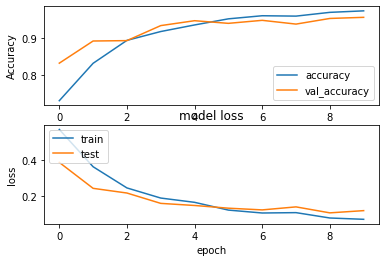

In [ ]:
model = model1()

In [ ]:
model.save('/content/drive/MyDrive/MajorProject/Models/my_model.h5')

In [ ]:
import tensorflow as tf
new_model = tf.keras.models.load_model('/content/drive/MyDrive/MajorProject/Models/my_model.h5')
# Show the model architecture
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resizing_3 (Resizing)       (None, 32, 32, 1)         0         
                                                                 
 conv2d_6 (Conv2D)           (None, 30, 30, 32)        320       
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 64)        0         
                                                                 
 flatten_3 (Flatten)         (None, 12544)             0         
                                                      

In [ ]:
y_test_predict = new_model.predict(X_test)
y_pred = []
for y_p in y_test_predict:
  y_pred.append(np.argmax([y_p]))
y_pred = np.array(y_pred).reshape((len(y_pred),1))

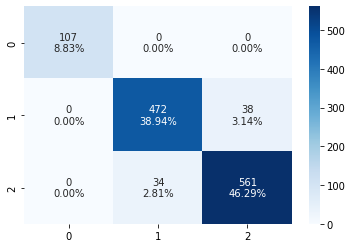

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test , y_pred)
#sns.heatmap(cf_matrix, annot=True)

#group_names = ["1","2","False Neg","True Pos"]
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v2}\n{v3}" for v2, v3 in
          zip(group_counts,group_percentages)]
labels = np.asarray(labels).reshape(3,3)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [ ]:
def prediction(test_filepath,offset=0,duration=1):
  signal, sr = librosa.load(test_filepath,sr=16000,duration=duration,offset=offset) ## offset 
  feature = stft(signal,sr)
  size = feature.shape
  feature = feature.reshape(1,size[0],size[1])
  output = new_model.predict(feature)
  output = np.argmax(output)
  return output

In [ ]:
path = '/content/drive/MyDrive/MajorProject/AudioDataset/45_135/'
k1 = 0.5
k2 = 0.2
TwoSource = path+'2_'+str(round(k1,3))+'_'+str(round(k2,3))+'.wav'
SingleSource = path+'1_'+str(round(k1,3))+'_'+str(round(0,3))+'.wav'
#SingleSource='/content/drive/MyDrive/MajorProject/s1_female.wav'
NoSource='/content/drive/MyDrive/MajorProject/AudioDataset/0/0_0216c2.wav'

test_filepath = '/content/2_bc28d9.wav'
output = []
for i in range(5):
  output.append(prediction(test_filepath,i,1))

In [ ]:
output

[2, 2, 2, 2, 2]

In [ ]:
import IPython.display as ipd
ipd.Audio(test_filepath) 

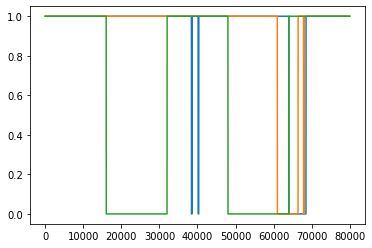

In [ ]:
in1= [[3, 11855], [12336, 68872], [70474, 72395], [73997, 80000]]
in1 = [[0, 38403], [38563, 40164], [40324, 64028], [68513, 80000]]
in2 = [[0, 12336], [16340, 66149], [72395, 73837], [73997, 80000]]
in2 = [[0, 60985], [66430, 67872], [68032, 80000]]
in3= [[0,16000],[16000,32000],[32000,48000],[48000,64000],[64000,80000]]
p1 = [0]*80000
p2 = [0]*80000
p3 = [0]*80000

for r in in1:
  for i in range(r[0],r[1]):
    p1[i]=1

for r in in2:
  for i in range(r[0],r[1]):
    p2[i]=1


c = 1
for r in in3:
  for i in range(r[0],r[1]):
    p3[i]=c
  if(c==1):
    c=0
  else:
    c=1

plt.plot(p1)
plt.plot(p2)
plt.plot(p3)